# Lab 08 Reinforcement Learning

In [4]:
import numpy as np
import matplotlib.pyplot as plt

First, we define a function that applies value function iteration. Just exectue the code below. Don't change it!

In [5]:
def vit(t_move,t_stay,reward,gamma):
    '''
    The function performs valuve function iteration. 

    Parameters
    ----------
    t_move : Transition probability matrix if agent decides to move -  2-d numpy array
    t_stay : Transition probability matrix if agent decides to stay -  2-d numpy array
    reward : Reward matrix for moving from one state to the next - 2-d numpy array
    gamma : Discount factor - float >0 and <1 

    Returns
    -------
    List with state values and optimal policy
    
    '''
    v_0=np.zeros((5,5))
    policy=["na","na","na","na","na"]
    c=100
    ha=1
    while c>0.0001:
        v_c=np.copy(v_0)
        if ha%10==0:
            print("Iteration:", ha)
        
        v_1_move=np.multiply(t_move,((reward+gamma*v_0))).sum(axis=1)
        v_1_stay=np.multiply(t_stay,((reward+gamma*v_0))).sum(axis=1)
        for i in range(0,5):
            if v_1_move[i]>=v_1_stay[i]:
                v_0[:,i]=v_1_move[i]
                policy[i]="move"
            else:
                v_0[:,i]=v_1_stay[i]
                policy[i]="stay"
        c=np.absolute(v_c[0,:]-v_0[0,:]).sum()
    
    output=[v_0[0,:],policy]
    
    return output


## Outline of the problem 

Consider the following problem: We have an agent that wants to move from left to right. For this reason, the agent can choose 
between two actions, go (to the right) or stay. The agent starts in field A. If it chooses to go,
 it will deterministically (probability=100%) move to the next field. If it decides to stay, it will deterministically stay on the current field. The goal is to find a strategy that helps the agent move from left to right as fast as possible. 
    
 [A][B][C][D][E]
  
    
    

## Reward structure

## Question 1

Let us now think about the reward structure:
The agent will receive a reward of +1 only when it reaches the final state (state E). For all other transitions, the reward will be 0 (also if the agents remains in the final state). 
Please fill in the missing part in the reward matrix below. 

In [6]:
r_0=np.array([0,0,0,0,1])
r_1=np.array([0,0,0,0,0])
reward=np.stack((r_0,r_0,r_0,r_0,r_1))

In [7]:
reward

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

## Transition matrix

## Question 2 

Next, we will think about the transition probabilities, i.e. we have to find the transition matrices for the two actions "move" and "stay". Please fill out the code below.

In [8]:
t_m_0=([0,1,0,0,0])
t_m_1=([0,0,1,0,0])
t_m_2=([0,0,0,1,0])
t_m_3=([0,0,0,0,1])
t_m_4=([0,0,0,0,0])
t_move=np.stack((t_m_0,t_m_1,t_m_2,t_m_3,t_m_4))

In [9]:
t_s_0=([1,0,0,0,0])
t_s_1=([0,1,0,0,0])
t_s_2=([0,1,0,0,0])
t_s_3=([0,0,1,0,0])
t_s_4=([0,0,0,1,0])
t_stay=np.stack((t_s_0,t_s_1,t_s_2,t_s_3,t_s_4))

In [10]:
t_move

array([[0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0]])

In [11]:
t_stay

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

##  Setting a value for gamma

## Question 3

Finally, we have to decide which discount factor we want to use. You can use every value between 0 and 1.

In [12]:
gamma=0.7

## Compute the value function and the optimal policy

## Question 4 

Now we are ready to start the value function iteration and to compute the optimal policy. Call the function vit and store the result.

In [13]:
res=vit(t_move,t_stay,reward,gamma)

Have a look at the results. What are they telling you?

In [14]:
res[0]

array([0.67248588, 0.96074012, 1.37248588, 1.96074012, 1.37248588])

In [15]:
res[1]

['move', 'move', 'move', 'move', 'stay']

Plot the optimal policy. Does this make sense to you?

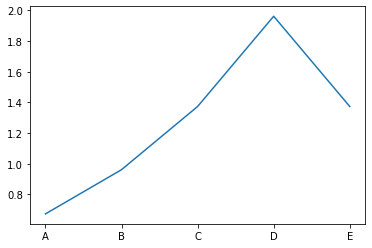

In [16]:
plt.plot(["A","B","C","D","E"],res[0])

# Se simones eller lasses, du har ikke downloaded matplotlib så se deres resultat

## Question 5 

How does the results change if we change gamma? Try different values for gamma.
Loop over different values of gamma and store the output of the value function in a list. The result should be a nested list.

In [17]:
v_vals=[]

for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    v_vals.append((vit(t_move,t_stay,reward,i)[0]))

In [18]:
v_vals

[array([1.0100e-03, 1.0100e-02, 1.0101e-01, 1.0101e+00, 1.0101e-01]),
 array([0.0083328, 0.041664 , 0.2083328, 1.041664 , 0.2083328]),
 array([0.02966838, 0.09889461, 0.32966838, 1.09889461, 0.32966838]),
 array([0.07618249, 0.19047299, 0.47618249, 1.19047299, 0.47618249]),
 array([0.16665649, 0.33331299, 0.66665649, 1.33331299, 0.66665649]),
 array([0.33746572, 0.56247943, 0.93746572, 1.56247943, 0.93746572]),
 array([0.67248588, 0.96074012, 1.37248588, 1.96074012, 1.37248588]),
 array([1.42214479, 1.77771583, 2.22214479, 2.77771583, 2.22214479]),
 array([3.83660536, 4.26294482, 4.73660536, 5.26294482, 4.73660536])]

In [19]:
v_vals=[]

for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    v_vals.append((vit(t_move,t_stay,reward,i)[1]))
    
v_vals

[['move', 'move', 'move', 'move', 'stay'],
 ['move', 'move', 'move', 'move', 'stay'],
 ['move', 'move', 'move', 'move', 'stay'],
 ['move', 'move', 'move', 'move', 'stay'],
 ['move', 'move', 'move', 'move', 'stay'],
 ['move', 'move', 'move', 'move', 'stay'],
 ['move', 'move', 'move', 'move', 'stay'],
 ['move', 'move', 'move', 'move', 'stay'],
 ['move', 'move', 'move', 'move', 'stay']]

## Question 6

Now we extend our state space. Instead of moving from point A to point E, the agent should now move from A to J (=there are 10 different states).
Look at the function vit and change it accordingly.

 [A][B][C][D][E][F][G][H][I][J]

In [20]:
def vit_1(t_move,t_stay,t_back,reward,gamma):
    '''
    The function performs valuve function iteration. 

    Parameters
    ----------
    t_move : Transition probability matrix if agent decides to move -  2-d numpy array
    t_stay : Transition probability matrix if agent decides to stay -  2-d numpy array
    reward : Reward matrix for moving from one state to the next - 2-d numpy array
    gamma : Discount factor - float >0 and <1 

    Returns
    -------
    List with state values and optimal policy
    
    '''
    v_0=np.zeros((10,10))
    policy=["na","na","na","na","na","na","na","na","na","na"]
    c=100
    ha=1
    while c>0.0001:
        v_c=np.copy(v_0)
        if ha%10==0:
            print("Iteration:", ha)
        
        v_1_move=np.multiply(t_move,((reward+gamma*v_0))).sum(axis=1)
        v_1_stay=np.multiply(t_stay,((reward+gamma*v_0))).sum(axis=1)
        v_1_back=np.multiply(t_back,((reward+gamma*v_0))).sum(axis=1)

        for i in range(0,10):
            if v_1_move[i]>=v_1_stay[i] and v_1_move[i]>=v_1_back[i]:
                v_0[:,i]=v_1_move[i]
                policy[i]="move"
            elif v_1_back[i]>=v_1_stay[i]:
                v_0[:,i]=v_1_back[i]
                policy[i]="back"
            else:
                v_0[:,i]=v_1_stay[i]
                policy[i]="stay"
        c=np.absolute(v_c[0,:]-v_0[0,:]).sum()
    
    output=[v_0[0,:],policy]
    
    return output

## Question 7

Unfortunately, we also have to change our reward structure. Please change it according to the new state space.

In [21]:
r_0=np.array([0,0,0,0,0,0,0,0,0,1])
r_1=np.array([0,0,0,0,0,0,0,0,0,0])
reward=np.stack((r_0,r_0,r_0,r_0,r_0,r_0,r_0,r_0,r_0,r_1))

In [22]:
reward

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Question 8

Please also modify the transition probabilities.

In [23]:
t_m_0=np.array([0,1,0,0,0,0,0,0,0,0])
t_m_1=np.array([0,0,1,0,0,0,0,0,0,0])
t_m_2=np.array([0,0,0,1,0,0,0,0,0,0])
t_m_3=np.array([0,0,0,0,1,0,0,0,0,0])
t_m_4=np.array([0,0,0,0,0,1,0,0,0,0])
t_m_5=np.array([0,0,0,0,0,0,1,0,0,0])
t_m_6=np.array([0,0,0,0,0,0,0,1,0,0])
t_m_7=np.array([0,0,0,0,0,0,0,0,1,0])
t_m_8=np.array([0,0,0,0,0,0,0,0,0,1])
t_m_9=np.array([0,0,0,0,0,0,0,0,0,0])

t_move=np.stack((t_m_0,t_m_1,t_m_2,t_m_3,t_m_4,t_m_5,t_m_6,t_m_7,t_m_8,t_m_9))


t_s_0=np.array([1,0,0,0,0,0,0,0,0,0])
t_s_1=np.array([0,1,0,0,0,0,0,0,0,0])
t_s_2=np.array([0,0,1,0,0,0,0,0,0,0])
t_s_3=np.array([0,0,0,1,0,0,0,0,0,0])
t_s_4=np.array([0,0,0,0,1,0,0,0,0,0])
t_s_5=np.array([0,0,0,0,0,1,0,0,0,0])
t_s_6=np.array([0,0,0,0,0,0,1,0,0,0])
t_s_7=np.array([0,0,0,0,0,0,0,1,0,0])
t_s_8=np.array([0,0,0,0,0,0,0,0,1,0])
t_s_9=np.array([0,0,0,0,0,0,0,0,0,1])

t_stay=np.stack((t_s_0,t_s_1,t_s_2,t_s_3,t_s_4,t_s_5,t_s_6,t_s_7,t_s_8,t_s_9))

t_b_0=np.array([0,0,0,0,0,0,0,0,0,0])
t_b_1=np.array([1,0,0,0,0,0,0,0,0,0])
t_b_2=np.array([0,1,0,0,0,0,0,0,0,0])
t_b_3=np.array([0,0,1,0,0,0,0,0,0,0])
t_b_4=np.array([0,0,0,1,0,0,0,0,0,0])
t_b_5=np.array([0,0,0,0,1,0,0,0,0,0])
t_b_6=np.array([0,0,0,0,0,1,0,0,0,0])
t_b_7=np.array([0,0,0,0,0,0,1,0,0,0])
t_b_8=np.array([0,0,0,0,0,0,0,1,0,0])
t_b_9=np.array([0,0,0,0,0,0,0,0,1,0])

t_back=np.stack((t_b_0,t_b_1,t_b_2,t_b_3,t_b_4,t_b_5,t_b_6,t_b_7,t_b_8,t_b_9))

In [24]:
t_stay

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [25]:
t_move

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
t_back

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

## Question 9

Compute the optimal policy. Call the function vit_1 using the new reward and transition matrices and store the result.

In [27]:
res_1=vit_1(t_move,t_stay,t_back,reward,gamma)

In [28]:
res_1[0]

array([0.11301366, 0.16146386, 0.23066266, 0.32953386, 0.47076266,
       0.67253386, 0.96076266, 1.37253386, 1.96076266, 1.37253386])

In [29]:
res_1[1]

['move',
 'move',
 'move',
 'move',
 'move',
 'move',
 'move',
 'move',
 'move',
 'back']

## Question 10


Can you think about a more complicated problem? For instance, you could allow the agent to move back; change the reward structure; or change the state space. Try it out!